In [10]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv('PAD_09_PD.csv', delimiter=';')
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [110]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

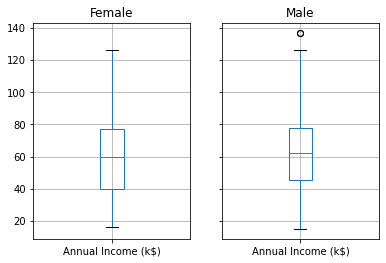

In [111]:
df.groupby('Gender').boxplot(column='Annual Income (k$)')

# ZAD 1

In [112]:
stats.ttest_ind(df.loc[df.Gender=='Male', 'Annual Income (k$)'] , df.loc[df.Gender=='Female', 'Annual Income (k$)'])

Ttest_indResult(statistic=0.795022298602198, pvalue=0.42755249399927864)

Hipoteza zerowa nie zostaje odrzucona ponieważ pvalue jest większe niż alpha (0.42755249399927864 > 0.05).

# ZAD 2

In [113]:
import plotly.express as px

In [114]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True) # stworzenie dummy variable dla atrybutu Gender
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [115]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df

,Gender_Male,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [117]:
import statsmodels.formula.api as smf

In [118]:
model = smf.ols('Q("Spending Score (1-100)") ~ Q("Annual Income (k$)") + Age + Gender_Male', data=df)
results = model.fit()

In [126]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Q("Spending Score (1-100)")   R-squared:                       0.109
Model:                                     OLS   Adj. R-squared:                  0.095
Method:                          Least Squares   F-statistic:                     7.960
Date:                         Mon, 30 May 2022   Prob (F-statistic):           4.91e-05
Time:                                 16:01:17   Log-Likelihood:                -922.05
No. Observations:                          200   AIC:                             1852.
Df Residuals:                              196   BIC:                             1865.
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  73.9300      6.642     11.130      0.000      60.831      87.029
Q("Annual Income (k$)")     0.0079      0.066      0.119      0.905      -0.123       0.139
Age                        -0.6004      0.125     -4.806      0.000      -0.847      -0.354
Gender_Male                -2.0132      3.512     -0.573      0.567      -8.939       4.913
==============================================================================
Omnibus:                       11.059   Durbin-Watson:                   3.448
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                6.033
Skew:                          -0.233   Prob(JB):                       0.0490
Kurtosis:                       2.288   Cond. No.                         291.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
results.pvalues

Intercept                  1.287752e-22
Q("Annual Income (k$)")    9.050939e-01
Age                        3.055177e-06
Gender_Male                5.671172e-01
dtype: float64

In [120]:
results.params

Intercept                  73.930034
Q("Annual Income (k$)")     0.007929
Age                        -0.600371
Gender_Male                -2.013234
dtype: float64

In [121]:
results.bse

Intercept                  6.642253
Q("Annual Income (k$)")    0.066420
Age                        0.124916
Gender_Male                3.511825
dtype: float64

In [135]:
px.imshow(df.corr(), text_auto=True)

Zmienna Spending Score (1-100) jest najbardziej skorelowana ze zmienną Age a najmniej z Annual Income.

In [127]:
model_b = smf.ols('Q("Spending Score (1-100)") ~ Age + Gender_Male', data=df)
results_b = model_b.fit()

In [131]:
results_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Q("Spending Score (1-100)")   R-squared:                       0.109
Model:                                     OLS   Adj. R-squared:                  0.099
Method:                          Least Squares   F-statistic:                     11.99
Date:                         Mon, 30 May 2022   Prob (F-statistic):           1.22e-05
Time:                                 16:02:00   Log-Likelihood:                -922.05
No. Observations:                          200   AIC:                             1850.
Df Residuals:                              197   BIC:                             1860.
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      74.4089      5.281     14.089      0.000      63.994      84.824
Age            -0.6006      0.125     -4.821      0.000      -0.846      -0.355
Gender_Male    -1.9892      3.497     -0.569      0.570      -8.886       4.908
==============================================================================
Omnibus:                       10.935   Durbin-Watson:                   3.447
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                5.938
Skew:                          -0.227   Prob(JB):                       0.0514
Kurtosis:                       2.289   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
results_b.pvalues

Intercept      1.221196e-31
Age            2.852827e-06
Gender_Male    5.701457e-01
dtype: float64

In [133]:
results_b.params

Intercept      74.408876
Age            -0.600608
Gender_Male    -1.989221
dtype: float64

In [134]:
results_b.bse

Intercept      5.281232
Age            0.124587
Gender_Male    3.497278
dtype: float64